C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


============== 1/16 ==============
epoch:0 | 0.1 - 0.127


..\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
..\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.117 - 0.128
epoch:2 | 0.117 - 0.147
epoch:3 | 0.117 - 0.172
epoch:4 | 0.117 - 0.187
epoch:5 | 0.117 - 0.203
epoch:6 | 0.117 - 0.219
epoch:7 | 0.117 - 0.235
epoch:8 | 0.117 - 0.241
epoch:9 | 0.117 - 0.258
epoch:10 | 0.117 - 0.263
epoch:11 | 0.117 - 0.272
epoch:12 | 0.117 - 0.299
epoch:13 | 0.117 - 0.317
epoch:14 | 0.117 - 0.344
epoch:15 | 0.117 - 0.357
epoch:16 | 0.117 - 0.365
epoch:17 | 0.117 - 0.381
epoch:18 | 0.117 - 0.388
epoch:19 | 0.117 - 0.408

C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "



============== 2/16 ==============
epoch:0 | 0.1 - 0.096
epoch:1 | 0.097 - 0.115
epoch:2 | 0.097 - 0.127
epoch:3 | 0.097 - 0.154
epoch:4 | 0.097 - 0.188
epoch:5 | 0.097 - 0.205
epoch:6 | 0.097 - 0.221
epoch:7 | 0.097 - 0.25
epoch:8 | 0.097 - 0.271
epoch:9 | 0.097 - 0.299
epoch:10 | 0.097 - 0.323
epoch:11 | 0.097 - 0.347
epoch:12 | 0.097 - 0.357
epoch:13 | 0.097 - 0.38
epoch:14 | 0.097 - 0.397
epoch:15 | 0.097 - 0.417
epoch:16 | 0.097 - 0.437
epoch:17 | 0.097 - 0.46
epoch:18 | 0.097 - 0.483
epoch:19 | 0.097 - 0.505
============== 3/16 ==============
epoch:0 | 0.162 - 0.084
epoch:1 | 0.365 - 0.09
epoch:2 | 0.535 - 0.128
epoch:3 | 0.603 - 0.173
epoch:4 | 0.674 - 0.223
epoch:5 | 0.744 - 0.262
epoch:6 | 0.789 - 0.303
epoch:7 | 0.823 - 0.348
epoch:8 | 0.857 - 0.372
epoch:9 | 0.883 - 0.404
epoch:10 | 0.924 - 0.433
epoch:11 | 0.933 - 0.469
epoch:12 | 0.949 - 0.491
epoch:13 | 0.961 - 0.521
epoch:14 | 0.972 - 0.542
epoch:15 | 0.976 - 0.557
epoch:16 | 0.977 - 0.586
epoch:17 | 0.981 - 0.608
epoch

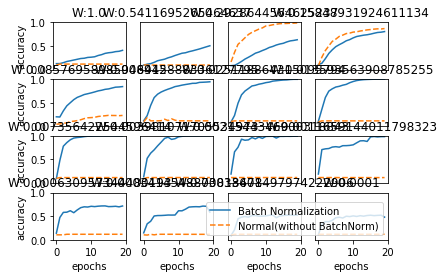

In [1]:
import sys,os
sys.path.append(os.pardir) # 부모디렉터리 접근 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend # 가중치감소, 드롭아웃, 배치정규화 구현
from common.optimizer import SGD, Adam

# 데이터 읽어오기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄이기
x_train = x_train[:1000] # 2차원 배열의 경우 행이 우선이므로 0행부터 999행까지의 데이터를 불러온다
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learnig_rate = 0.01

def __train(weight_init_std):
    # 배치정규화를 이용했을 때
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std, use_batchnorm=True)

    # 배치정규화를 이용하지 않았을 때
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10, 
                                    weight_init_std=weight_init_std)
    
    optimizer = SGD(lr=learnig_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size/batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch==0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list

# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)
    
    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')
    
plt.show()
